In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
dfTrain=pd.read_csv("train.csv")
dfTest=pd.read_csv("test.csv")
#Keep the original copies
dfTr=dfTrain.copy()
dfTe=dfTest.copy()

In [3]:
print(dfTrain.head(10))
print(dfTest.tail(10))

            row_id  cfips          county    state first_day_of_month  \
0  1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1  1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2  1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3  1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4  1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   
5  1001_2020-01-01   1001  Autauga County  Alabama         2020-01-01   
6  1001_2020-02-01   1001  Autauga County  Alabama         2020-02-01   
7  1001_2020-03-01   1001  Autauga County  Alabama         2020-03-01   
8  1001_2020-04-01   1001  Autauga County  Alabama         2020-04-01   
9  1001_2020-05-01   1001  Autauga County  Alabama         2020-05-01   

   microbusiness_density  active  
0               3.007682    1249  
1               2.884870    1198  
2               3.055843    1269  
3               2.993233    1243  
4               2.993

In [4]:
#Check for feature inconsistencies
#The function for finding raw date pattern
def findPattern(datePattern,strData):
    try:
        strInfo=re.findall(datePattern,strData)[0]
    except:
        strInfo=""
    return strInfo


#The function for seperating county id from date string
def seperateCountyId(x):
    datePattern=r"([^=\"]*)_[^=\"]*"
    strInfo=findPattern(datePattern,x)
    return strInfo

#The function for seperating date string from county id
def seperateCountyDate(x):
    datePattern=r"[^=\"]*_([^=\"]*)"
    strInfo=findPattern(datePattern,x)
    return strInfo

def checkColumnsEquality(df,col1,col2):
    return df[col1].equals(df[col2])


In [5]:
dfTrain["cfipsChecked"]=pd.to_numeric(dfTrain["row_id"].apply(seperateCountyId))
dfTrain["dateChecked"]=dfTrain["row_id"].apply(seperateCountyDate)

In [6]:
print("Date Columns are equal? : "+str(checkColumnsEquality(dfTrain,col1="dateChecked",col2="first_day_of_month")))
print("CFIPS Columns are equal? : "+str(checkColumnsEquality(dfTrain,col1="cfipsChecked",col2="cfips")))

Date Columns are equal? : True
CFIPS Columns are equal? : True


In [7]:
dfTest["cfipsChecked"]=pd.to_numeric(dfTest["row_id"].apply(seperateCountyId))
dfTest["dateChecked"]=dfTest["row_id"].apply(seperateCountyDate)

In [8]:
print("Date Columns are equal? : "+str(checkColumnsEquality(dfTest,col1="dateChecked",col2="first_day_of_month")))
print("CFIPS Columns are equal? : "+str(checkColumnsEquality(dfTest,col1="cfipsChecked",col2="cfips")))

Date Columns are equal? : True
CFIPS Columns are equal? : True


In [9]:
columnsToRemoveTrain=["dateChecked","cfipsChecked","row_id", "county", "state", "active"]
columnsToRemoveTest=["dateChecked","cfipsChecked","row_id"]

dfTrain=dfTrain.drop(columns=columnsToRemoveTrain)
dfTest=dfTest.drop(columns=columnsToRemoveTest)

print(dfTrain.head(10))
print(dfTest.tail(10))

   cfips first_day_of_month  microbusiness_density
0   1001         2019-08-01               3.007682
1   1001         2019-09-01               2.884870
2   1001         2019-10-01               3.055843
3   1001         2019-11-01               2.993233
4   1001         2019-12-01               2.993233
5   1001         2020-01-01               2.969090
6   1001         2020-02-01               2.909326
7   1001         2020-03-01               2.933231
8   1001         2020-04-01               3.000167
9   1001         2020-05-01               3.004948
       cfips first_day_of_month
25070  56027         2023-06-01
25071  56029         2023-06-01
25072  56031         2023-06-01
25073  56033         2023-06-01
25074  56035         2023-06-01
25075  56037         2023-06-01
25076  56039         2023-06-01
25077  56041         2023-06-01
25078  56043         2023-06-01
25079  56045         2023-06-01


In [10]:
dfTrain["first_day_of_month"]=pd.to_datetime(dfTrain["first_day_of_month"], yearfirst=True)
dfTest["first_day_of_month"]=pd.to_datetime(dfTest["first_day_of_month"], yearfirst=True)

In [11]:
dfTrain["year"]=dfTrain["first_day_of_month"].dt.year
dfTrain["month"]=dfTrain["first_day_of_month"].dt.month
dfTest["year"]=dfTest["first_day_of_month"].dt.year
dfTest["month"]=dfTest["first_day_of_month"].dt.month

In [12]:
dfTrain=dfTrain[["first_day_of_month", "year", "month", "cfips", "microbusiness_density"]]
dfTest=dfTest[["first_day_of_month", "year", "month", "cfips"]]
dfTrain.reset_index(drop=True,inplace=True)
dfTest.reset_index(drop=True,inplace=True)

print(dfTrain.head(10))
print(dfTest.tail(10))

  first_day_of_month  year  month  cfips  microbusiness_density
0         2019-08-01  2019      8   1001               3.007682
1         2019-09-01  2019      9   1001               2.884870
2         2019-10-01  2019     10   1001               3.055843
3         2019-11-01  2019     11   1001               2.993233
4         2019-12-01  2019     12   1001               2.993233
5         2020-01-01  2020      1   1001               2.969090
6         2020-02-01  2020      2   1001               2.909326
7         2020-03-01  2020      3   1001               2.933231
8         2020-04-01  2020      4   1001               3.000167
9         2020-05-01  2020      5   1001               3.004948
      first_day_of_month  year  month  cfips
25070         2023-06-01  2023      6  56027
25071         2023-06-01  2023      6  56029
25072         2023-06-01  2023      6  56031
25073         2023-06-01  2023      6  56033
25074         2023-06-01  2023      6  56035
25075         2023-06-01  

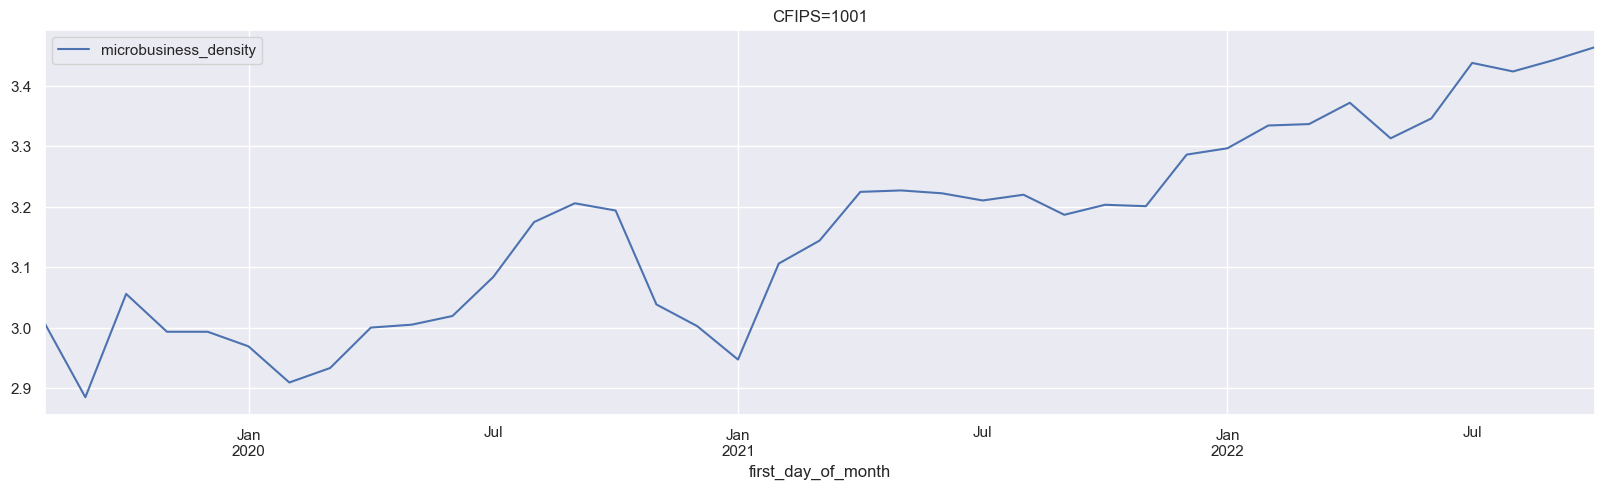

In [13]:
dfTrain[dfTrain.cfips==1001].plot(x="first_day_of_month",y="microbusiness_density",figsize=(20,5), title = "CFIPS=1001")
plt.show()

In [15]:
#See the features 
dfTrain.columns

Index(['first_day_of_month', 'year', 'month', 'cfips',
       'microbusiness_density'],
      dtype='object')

In [17]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   first_day_of_month     122265 non-null  datetime64[ns]
 1   year                   122265 non-null  int64         
 2   month                  122265 non-null  int64         
 3   cfips                  122265 non-null  int64         
 4   microbusiness_density  122265 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.7 MB


In [31]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25080 entries, 0 to 25079
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   first_day_of_month  25080 non-null  datetime64[ns]
 1   year                25080 non-null  int64         
 2   month               25080 non-null  int64         
 3   cfips               25080 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 783.9 KB


In [22]:
pd.options.display.max_columns = 4000
pd.options.display.max_rows = 4000

In [26]:
oneStateFreq=dfTrain["cfips"].value_counts().iloc[0]

In [29]:
checkFunc=lambda x: 0 if x==oneStateFreq else 1

In [30]:
#All states have same amount of information inside the train dataset
dfTrain["cfips"].value_counts().apply(checkFunc).sum()

0

In [32]:
oneStateFreq=dfTest["cfips"].value_counts().iloc[0]

In [33]:
#All states have same amount of information inside the test set
dfTest["cfips"].value_counts().apply(checkFunc).sum()

0

In [39]:
#Check whether "cfips" of the train set and test set are the same
#These checks are important to be done for all newcommer dataset as long as time period passes
#THerefore if we have missing states or data in the future, we can easily detect it by using checks.
checkCfips=pd.DataFrame(columns=["trainCfips","testCfips"])
checkCfips["trainCfips"]=dfTrain["cfips"].value_counts().index.sort_values()
checkCfips["testCfips"]=dfTest["cfips"].value_counts().index.sort_values()
def checkCfipsFunc(df):
    if df["trainCfips"].equals(df["testCfips"]):
        print("We checked the equality of cfips values w.r.t. train and test set")
        return True
    else:
        return False

checkCfipsFunc(checkCfips)

We checked the equality of cfips values w.r.t. train and test set


True